# EDA on Kaggle COVID-19 Dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

## Load the Data

In [2]:
train = pd.read_csv('../data/raw/train.csv')
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


## Pandas Profiler
Build-in Quick Pandas Reporting Tool

In [3]:
profile = ProfileReport(train)

C:\Users\patri\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [4]:
profile

Number of variables,8
Number of observations,17324
Total Missing (%),6.8%
Total size in memory,1.1 MiB
Average record size in memory,64.0 B
Numeric,4
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## Examine the Data
First look at data.

In [5]:
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


### .info() and .shape to see length and dtypes

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17324 entries, 0 to 17323
Data columns (total 8 columns):
Id                17324 non-null int64
Province/State    7930 non-null object
Country/Region    17324 non-null object
Lat               17324 non-null float64
Long              17324 non-null float64
Date              17324 non-null object
ConfirmedCases    17324 non-null float64
Fatalities        17324 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [7]:
train.dtypes

Id                  int64
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
ConfirmedCases    float64
Fatalities        float64
dtype: object

In [8]:
train.shape

(17324, 8)

### Check for nulls

#### County Level

In [9]:
train.isnull().any()

Id                False
Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
ConfirmedCases    False
Fatalities        False
dtype: bool

In [10]:
train.isnull().sum().sort_values(ascending = False)

Province/State    9394
Fatalities           0
ConfirmedCases       0
Date                 0
Long                 0
Lat                  0
Country/Region       0
Id                   0
dtype: int64

In [11]:
train['Province/State'].isnull().value_counts()

True     9394
False    7930
Name: Province/State, dtype: int64

In [12]:
missing_state = train[train['Province/State'].isnull()==True]
missing_state['Country/Region'].value_counts()

### missing fips mainly due to unknown county. (some cases from new york city & kansas city)

Korea, South    61
Seychelles      61
Cuba            61
Egypt           61
Bhutan          61
                ..
Argentina       61
Russia          61
Mayotte         61
The Gambia      61
Slovenia        61
Name: Country/Region, Length: 154, dtype: int64

### Check for duplicates

In [13]:
train.duplicated().sum()

0

### Check Date Range Records

C:\Users\patri\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


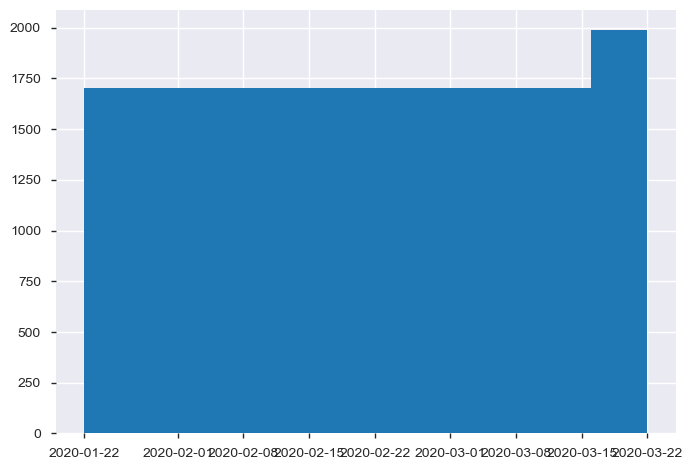

In [14]:
pd.to_datetime(train.Date).hist()

### Identify Numerical vs Categorical Variables

In [15]:
train.columns

Index(['Id', 'Province/State', 'Country/Region', 'Lat', 'Long', 'Date',
       'ConfirmedCases', 'Fatalities'],
      dtype='object')

In [16]:
#rename headers
train.rename({'Country/Region': 'country', 'Province/State': 'province', 'Id': 'id', 'Lat':'lat', 'Long':'long',
              'Date': 'date', 'ConfirmedCases': 'confirmed', 'Fatalities': 'deaths'}, axis=1, inplace=True)

In [17]:
numeric_cols = ['id','Lat','Long','confirmed','deaths']
categorical_cols = ['country','province','date']

### Summarize Basic Stats with .describe() separating numeric vs categorical

In [18]:
train.describe(include = [np.number])

,id,lat,long,confirmed,deaths
count,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000
mean,13190.500000,26.287693,4.766191,293.191180,10.421208
std,7624.680783,22.935113,79.923334,3382.665468,155.612328
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6595.750000,13.145425,-71.516375,0.000000,0.000000
50%,13190.500000,32.985550,9.775000,0.000000,0.000000
75%,19785.250000,42.501575,64.688975,8.000000,0.000000
max,26380.000000,71.706900,174.886000,67800.000000,5476.000000


In [19]:
train.describe(include = ['O'])

,province,country,date
count,7930,17324,17324
unique,128,163,61
top,Diamond Princess,US,2020-03-20
freq,122,3538,284


In [20]:
train.country.value_counts(sort=True).head(15)


US                3538
China             2013
Canada             671
Australia          549
France             488
United Kingdom     305
Netherlands        183
Denmark            122
Finland             61
Colombia            61
Guinea              61
Russia              61
Mayotte             61
Guam                61
Croatia             61
Name: country, dtype: int64

### Visualize Overall Target Variables (Deaths and Cases)

In [41]:
def plot_target(df,country = False, province = False):
    confirmed_total_df = df.groupby(['date']).agg({'confirmed':['sum']})
    fatalities_total_df = df.groupby(['date']).agg({'deaths':['sum']})
    totals_df = confirmed_total_df.join(fatalities_total_df)
    
    if country == True:
        country_name =f'{df.reset_index().country[0]} - ' 
    else:
        country_name =""
        
    if province == True:
        province_name =f' {df.reset_index().province[0]} - '
    else:
        province_name =""
        
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
    totals_df.plot(ax=ax1)
    ax1.set_title(f'{country_name}{province_name}Confirmed Cases',size =15)
    ax1.set_ylabel('Number of Cases', size=13)
    ax1.set_xlabel('Date',size =13)


    fatalities_total_df.plot(ax=ax2, color = 'red')
    ax2.set_title(f"{country_name}{province_name}Deceased Cases", size=15)
    ax2.set_ylabel("Number of Cases", size=13)
    ax2.set_xlabel("Date", size=13)
    

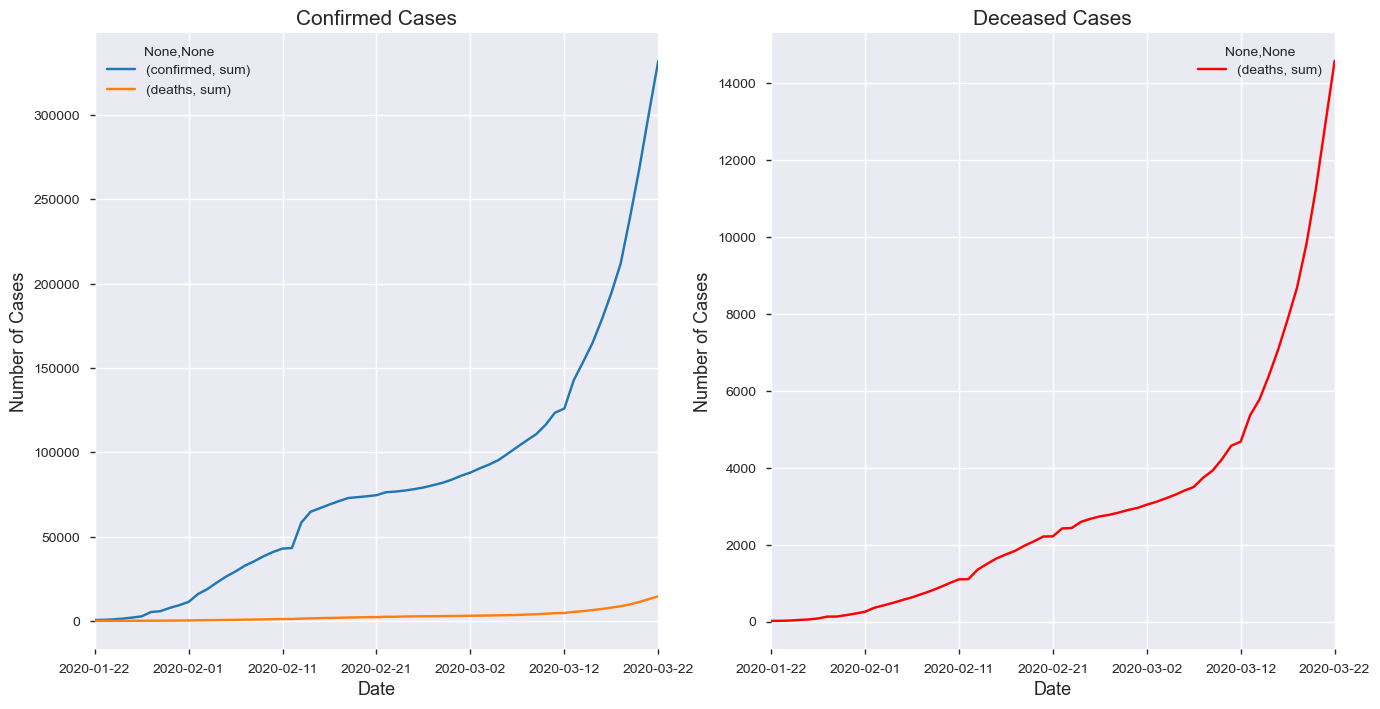

In [42]:
plot_target(train)

In [43]:
# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# sns.boxplot(train.confirmed)
# plt.subplot(1,2,2)
# sns.distplot(train.confirmed, bins=20)
# plt.show()

## Not right plot



In [44]:
# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# sns.boxplot(train.deaths)
# plt.subplot(1,2,2)
# sns.distplot(train.deaths, bins=20)
# plt.show()

## Not right plot

### Use IQR rule to identify potential outliers

In [45]:
stat = train.deaths.describe()
IQR = stat['75%']- stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] + 1.5 * IQR
print(f'The upper and lower bounds for suspected IQR outliers are {upper} and {lower}')

The upper and lower bounds for suspected IQR outliers are 0.0 and 0.0


In [46]:
#checking for potential outliers below lower bound
# train[train.deaths < lower]

In [47]:
# #checking for potential outliers above upper bound
# train[train.deaths > upper]


## all can be legitmate, seems like there is various spikes in deaths.

### Plotting Per Feature

In [48]:
# def plot_feature(df,col):
#     '''Making plot for each features'''
#     plt.figure(figsize =(14,6))
#     plt.subplot(1,2,1)
#     if df[col].dtype == 'int64':
#         df[col].value_counts().sort_index().plot()
#     else: 
#         # change the categorical variable to category type and order their level by the mean in each category
        
#         mean = df.groupby(col)['deaths'].mean()
#         df[col] = df[col].astype('category')
#         levels = mean.sort_values().index.tolist()
#         df[col].cat.reorder_categories(levels, inplace=True)
#         df[col].value_counts().plot()
#     plt.xticks(rotation = 45)
#     plt.xlabel(col)
#     plt.ylabel('Counts')
#     plt.subplot(1,2,2)
    
#     if df[col].dtype == 'int64' or col == 'companyId':
#         # plot the mean deaths for each category and fill between the (mean - std, mean + std)
#         mean = df.groupby(col)['deaths'].mean()
#         std = df.groupby(col)['deaths'].std()
#         mean.plot()
#         plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values+std.values, alpha = 0.1)
    
#     else:
#         sns.boxplot(x = col, y = 'deaths', data =df)
#     plt.xticks(rotation =45)
#     plt.ylabel('Deaths')
#     plt.show()

In [49]:
# for i in state_df.columns:
   
#     plot_feature(state_df,i)

### Function for target label encoding

In [50]:
# def encode_label(df, col):
#     # encode the categories using average deaths for each category to replace label
#     cat_dict = {}
#     cats = df[col].cat.categories.tolist()
#     for cat in cats:
#         cat_dict[cat] = df[df[col] == cat]['deaths'].mean()
#     df[col] = df[col].map(cat_dict)
    

In [51]:
# for col in state_df.columns:
#     if state_df[col].dtype.name == 'category':
#         encode_label(state_df,col)

### Plotting Per Top 10 Country

In [50]:
# create dataframe of top aggregated deaths by state in US
top_country_df = train.groupby('country').agg('sum')

In [51]:
top_country_df.deaths.sort_values(ascending=False).head(20)
# Looks right according to the news

country
China             114573.0
Italy              33959.0
Iran               13124.0
Spain               7345.0
France              2859.0
US                  1727.0
Korea, South        1439.0
United Kingdom      1100.0
Netherlands          690.0
Japan                412.0
Germany              395.0
Switzerland          393.0
Belgium              246.0
Indonesia            188.0
Philippines          187.0
Cruise Ship          181.0
Iraq                 174.0
San Marino           119.0
Sweden                99.0
Canada                85.0
Name: deaths, dtype: float64

In [52]:
top_country = top_country_df.deaths.sort_values(ascending=False).index[0:10]

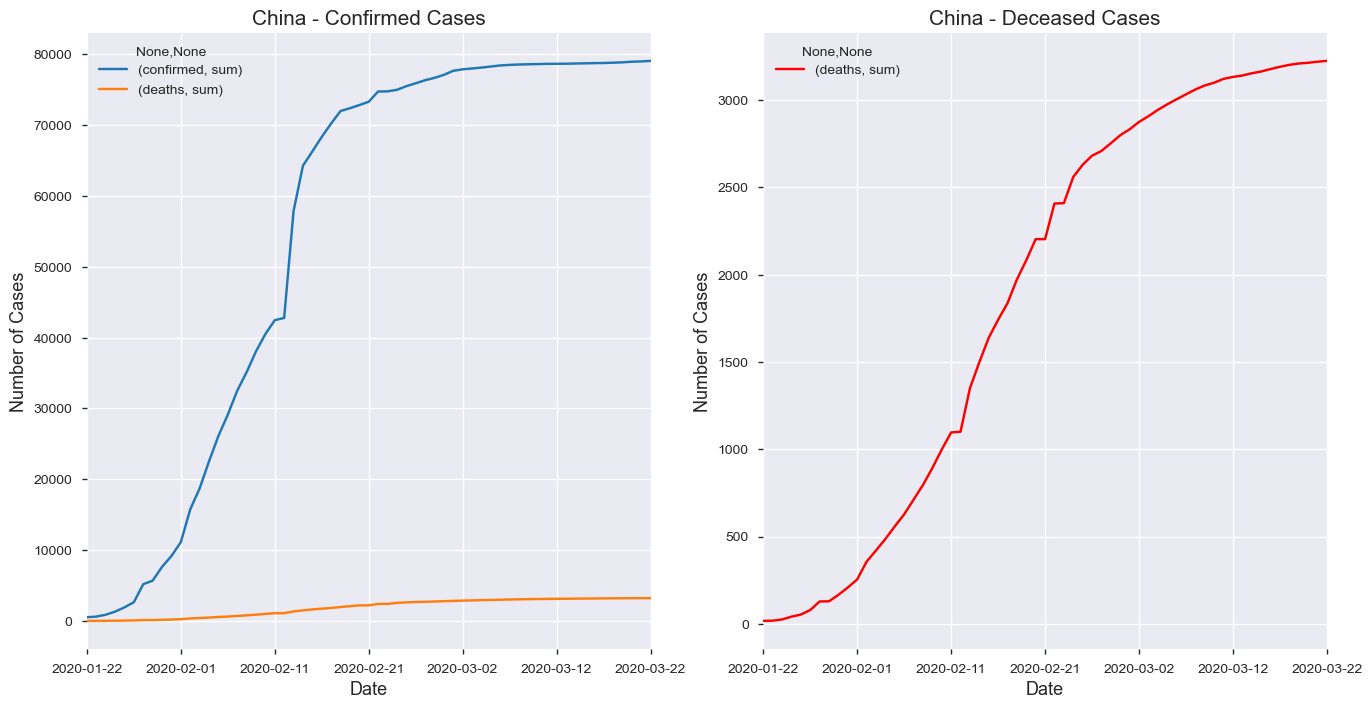

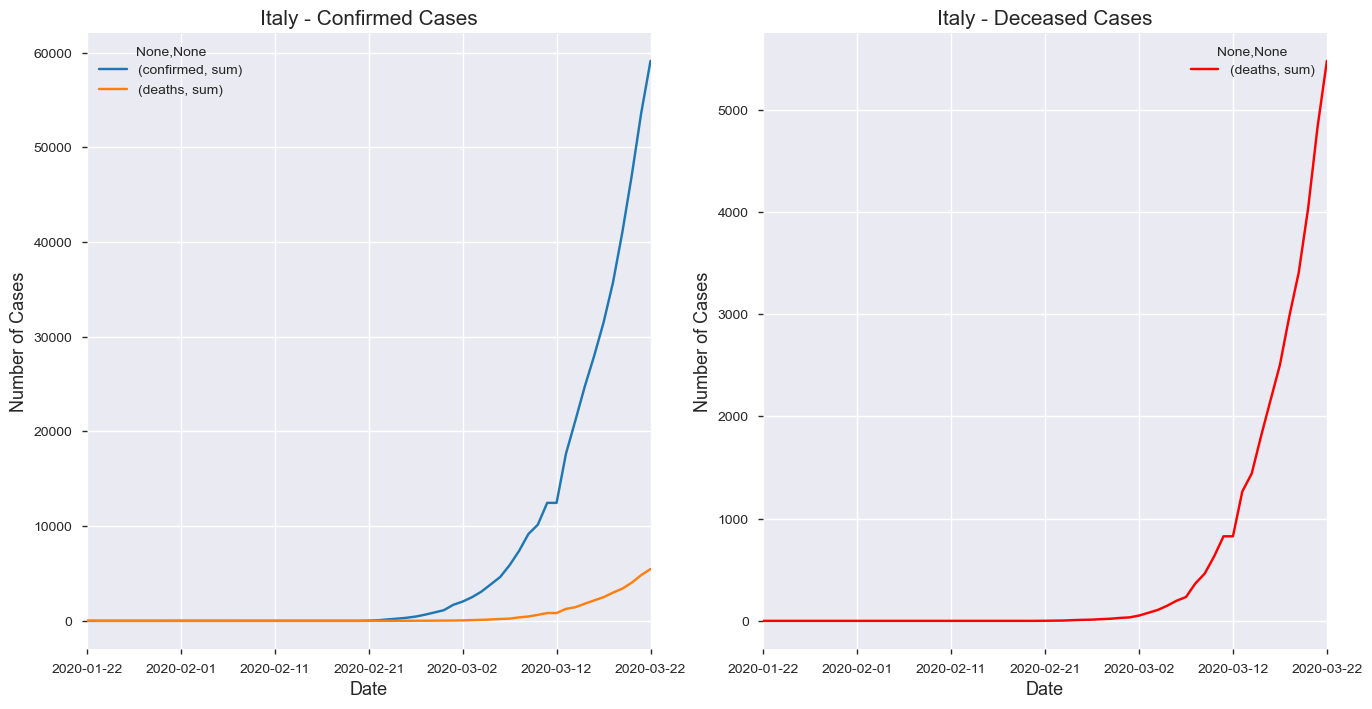

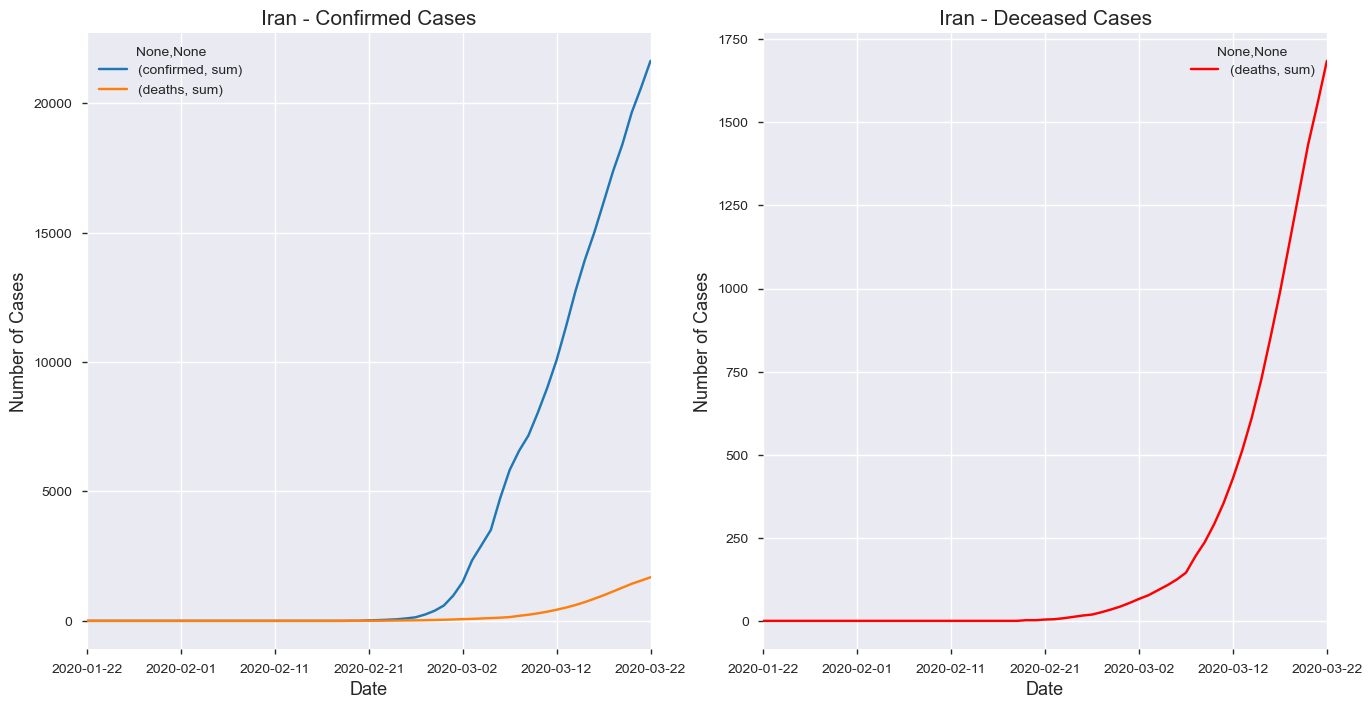

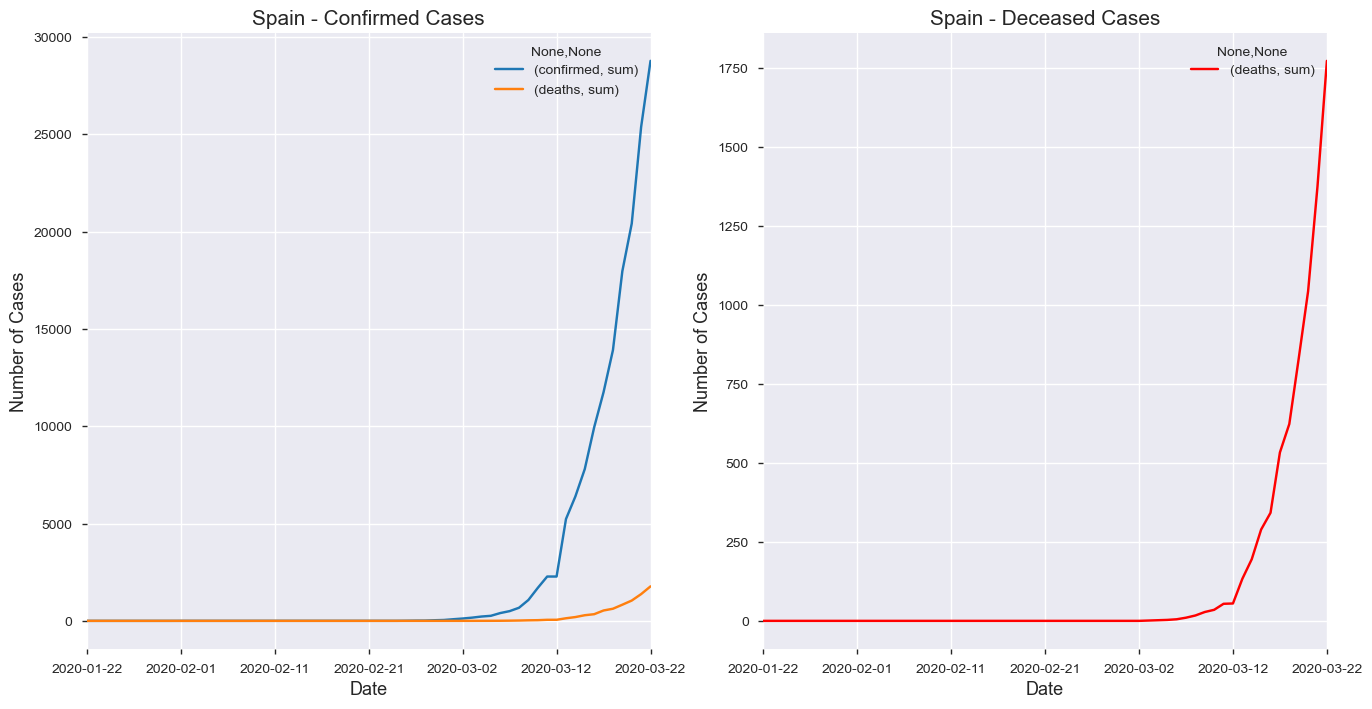

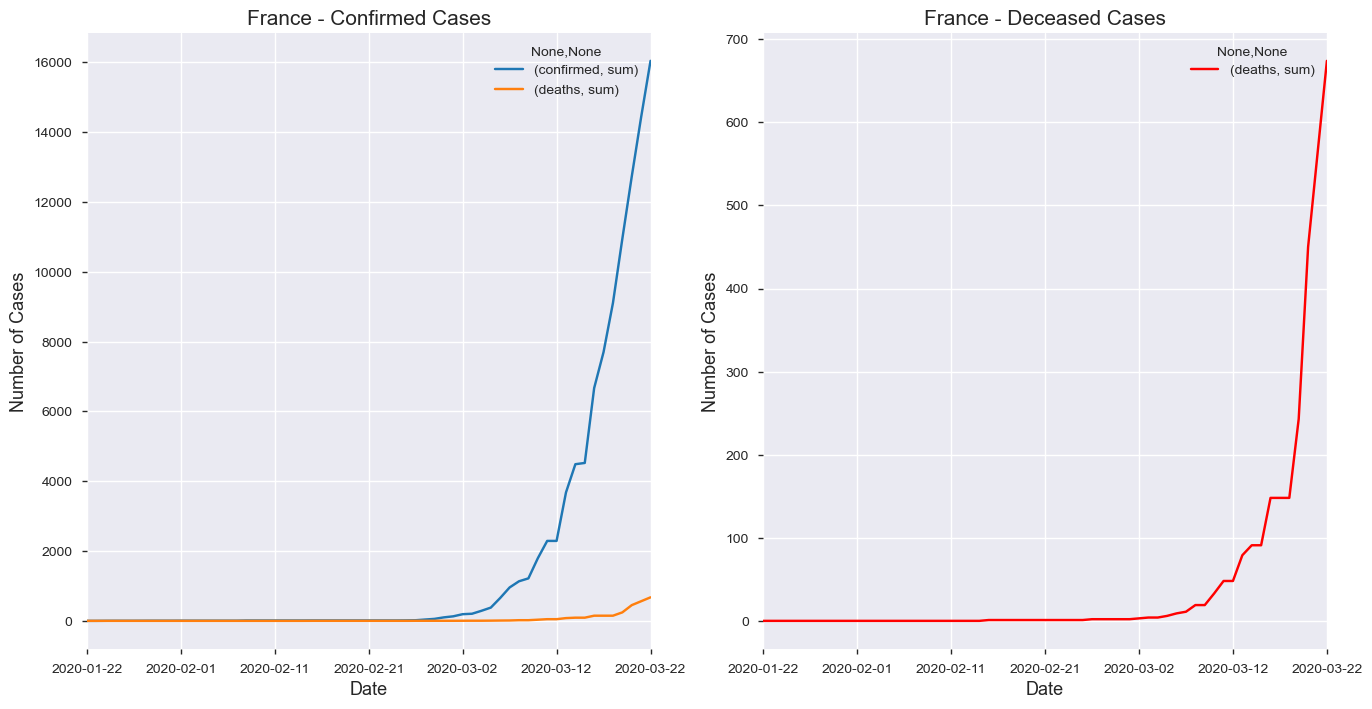

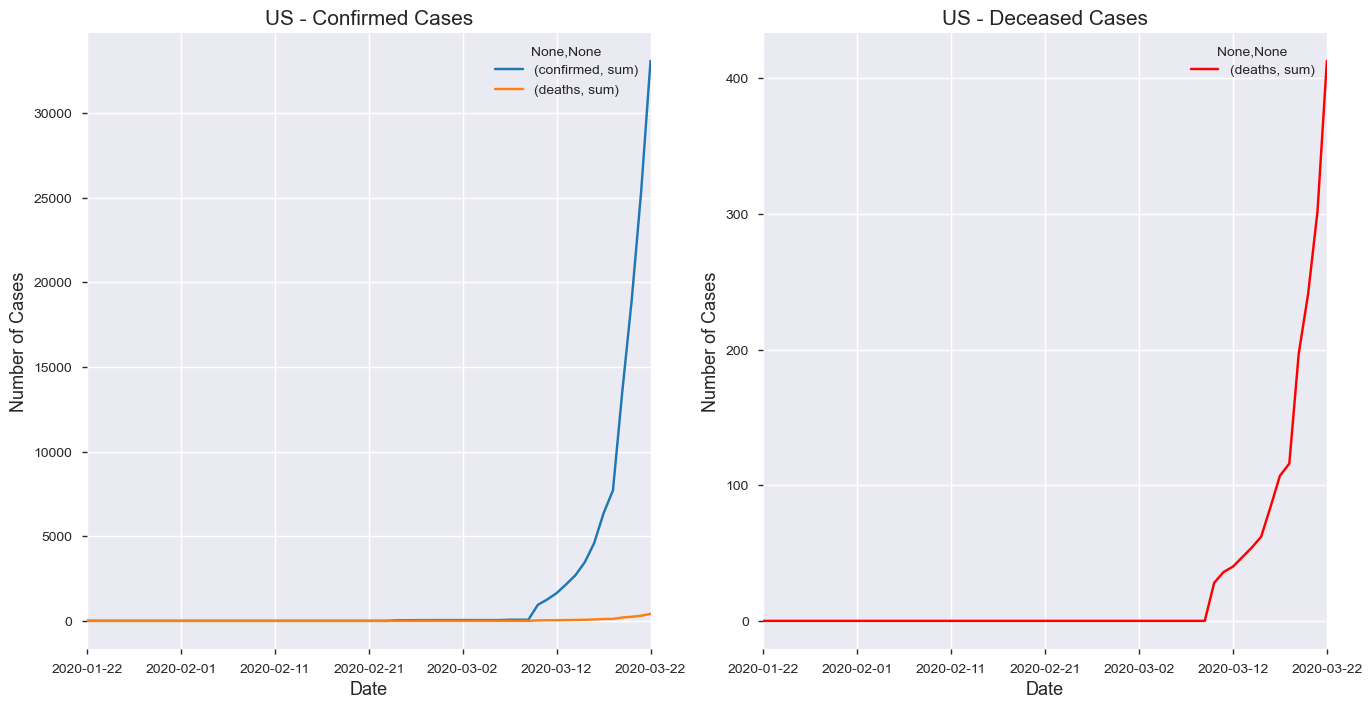

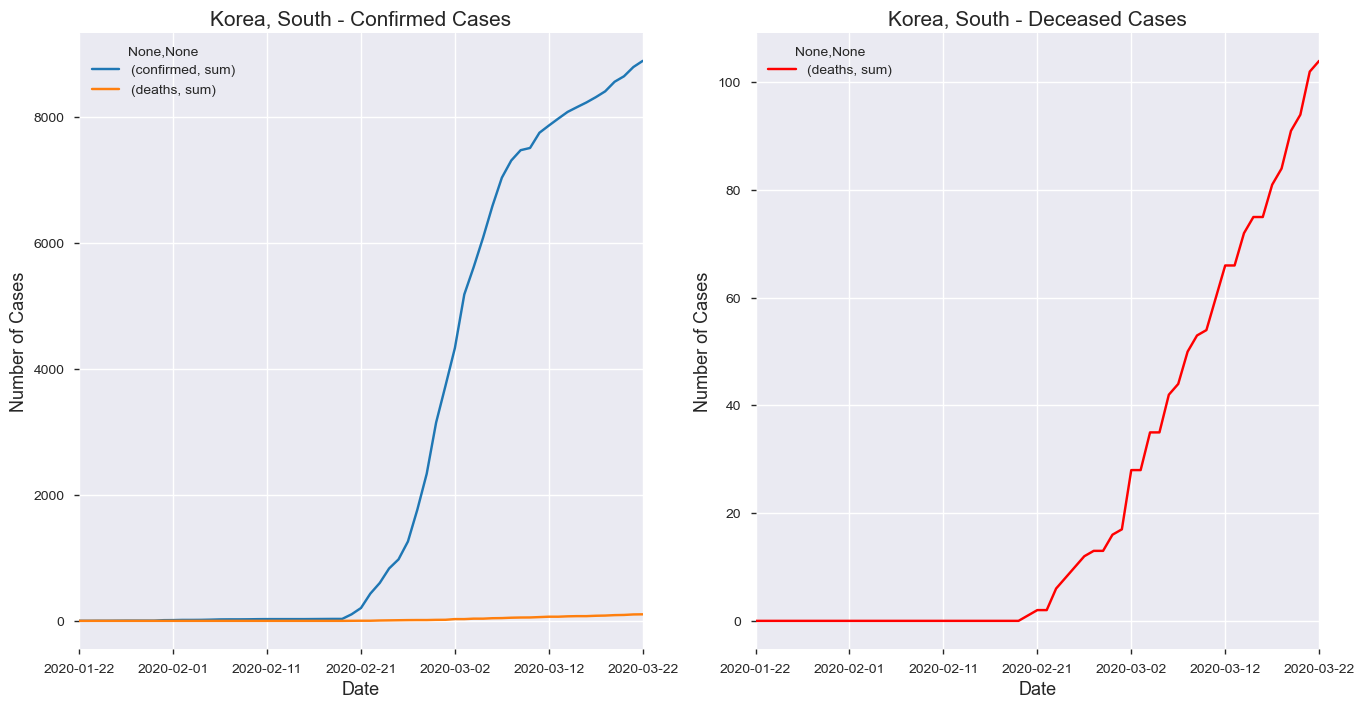

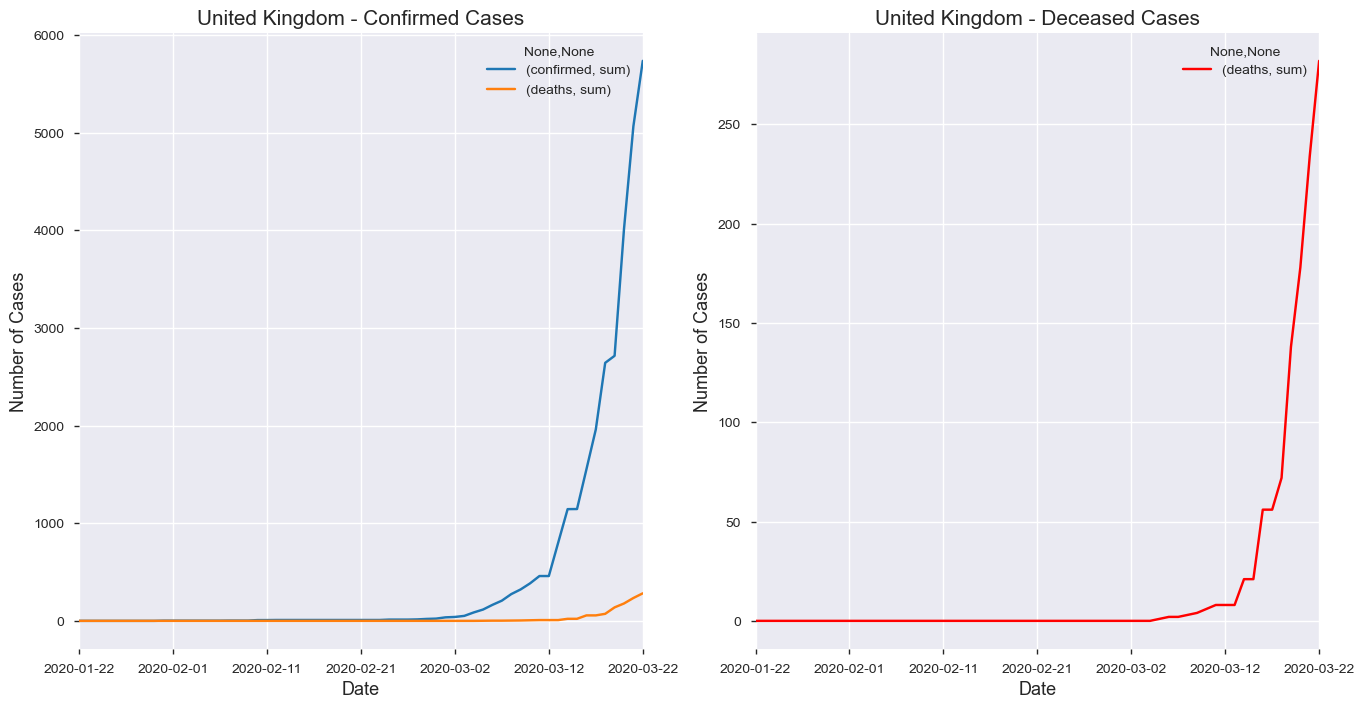

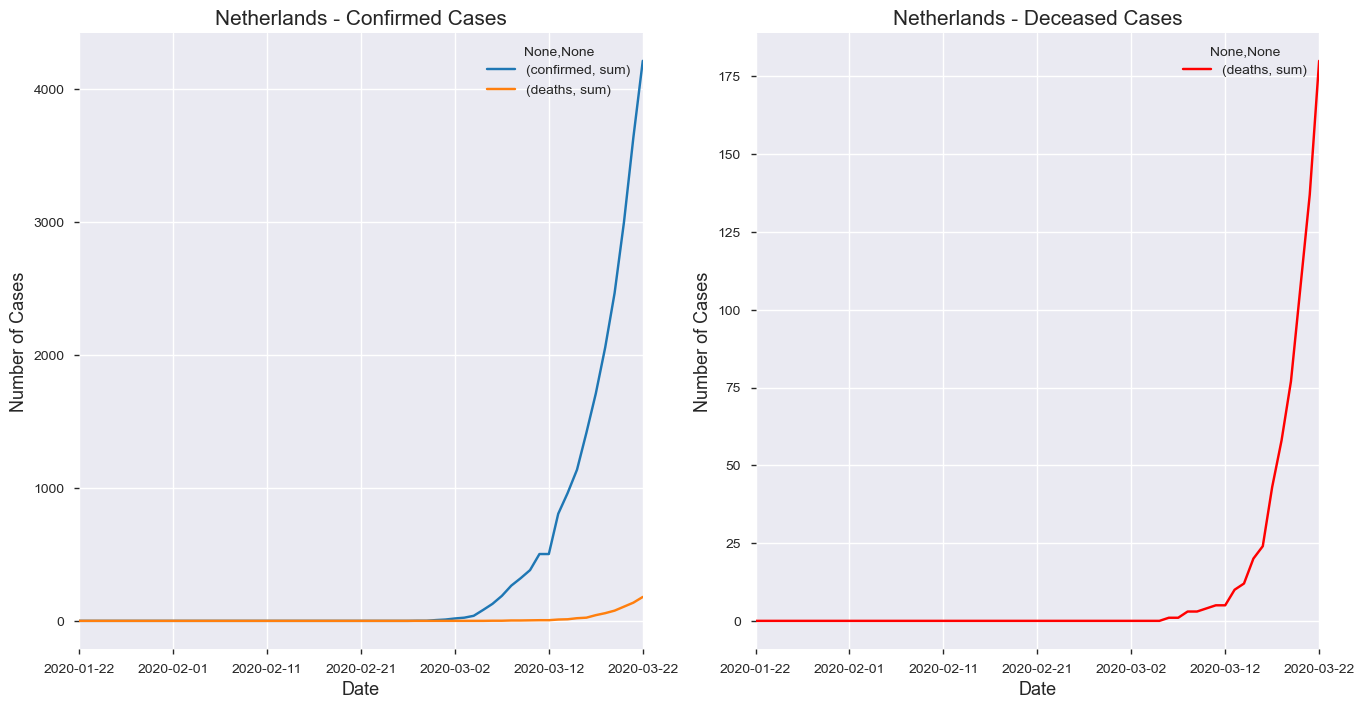

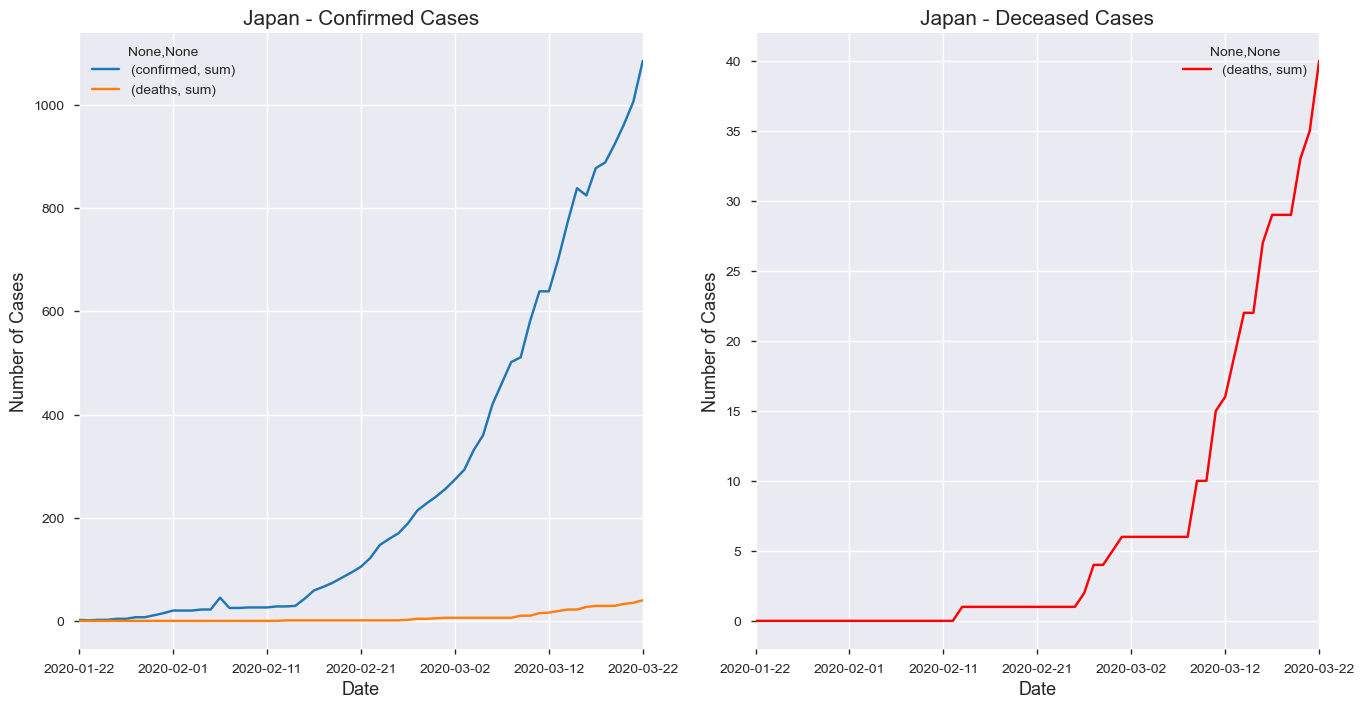

In [54]:
for i in range(0,len(top_country)):
    plot_target(train[train.country == top_country[i]],country=True)

### Plotting Per Top 20 Province


In [55]:
# create dataframe of top aggregated deaths by state in US
top_province_df = train.groupby('province').agg('sum')

In [56]:
top_province_df.deaths.sort_values(ascending=False).head(20)
# Noted dropped Unknown category

province
Hubei               111744.0
France                2859.0
United Kingdom        1093.0
Washington             701.0
Netherlands            686.0
New York               297.0
Beijing                274.0
Guangdong              257.0
Chongqing              251.0
Anhui                  245.0
Hebei                  238.0
Hainan                 231.0
Shandong               214.0
Diamond Princess       181.0
Hunan                  154.0
California             151.0
Tianjin                127.0
Sichuan                126.0
Hong Kong              106.0
Xinjiang                93.0
Name: deaths, dtype: float64

In [57]:
top_province = top_province_df.deaths.sort_values(ascending=False).index[0:20]

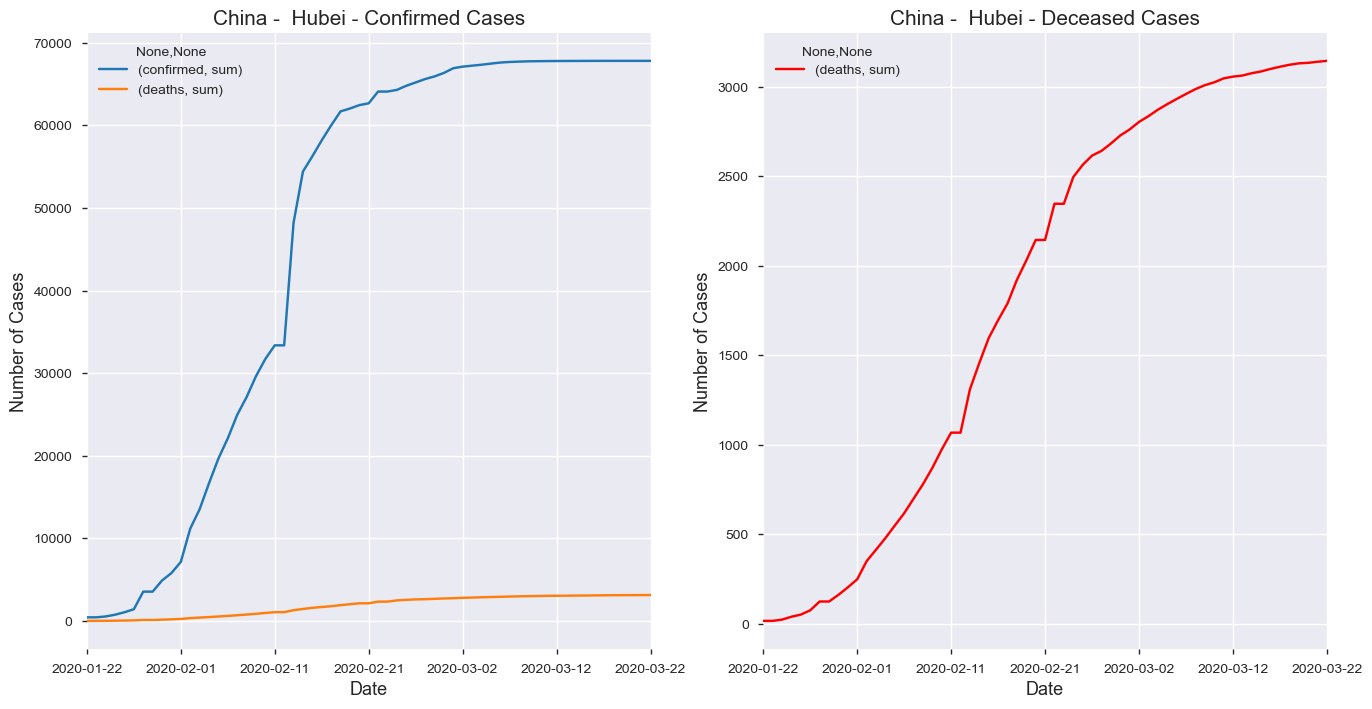

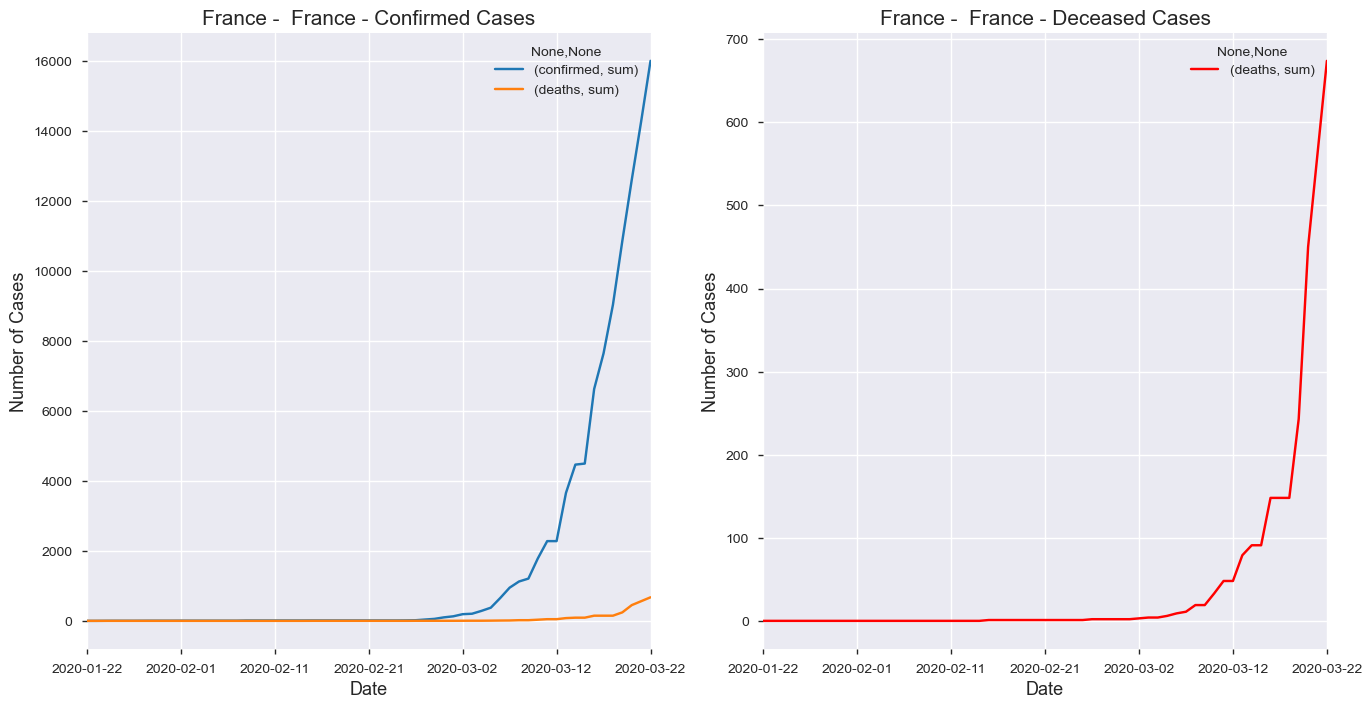

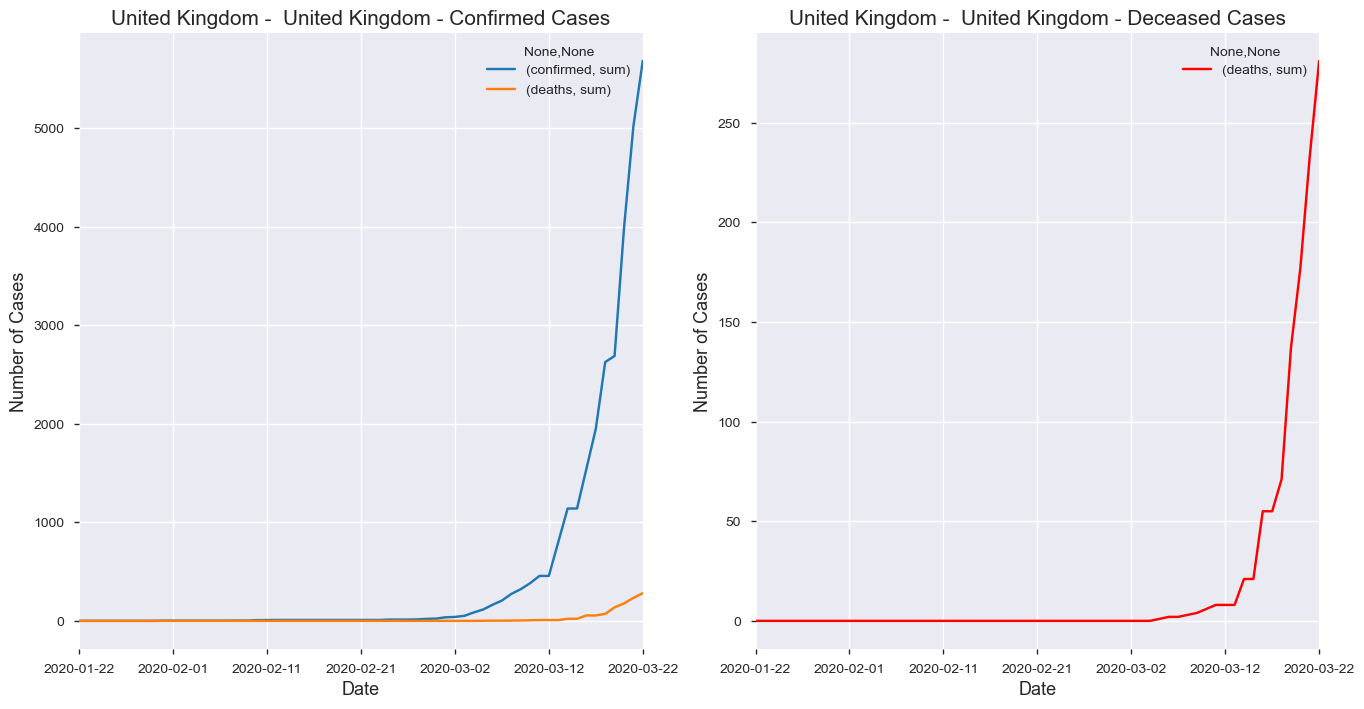

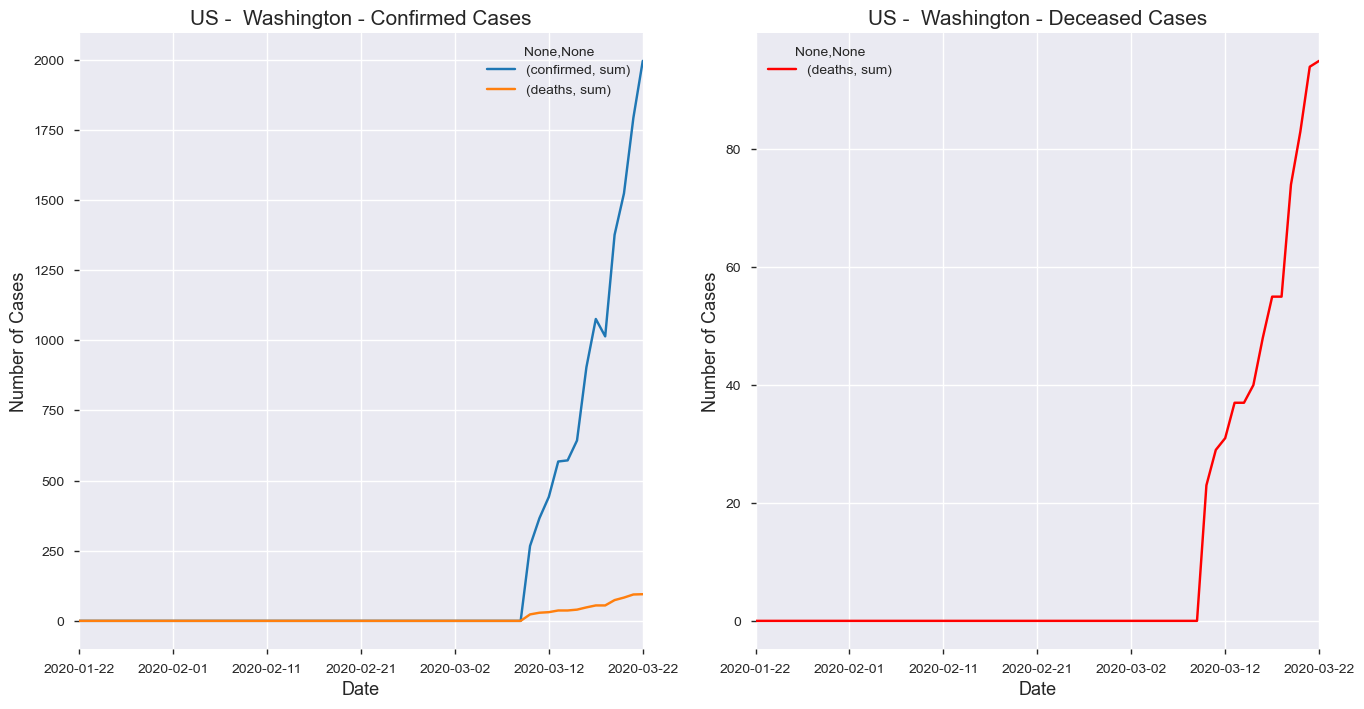

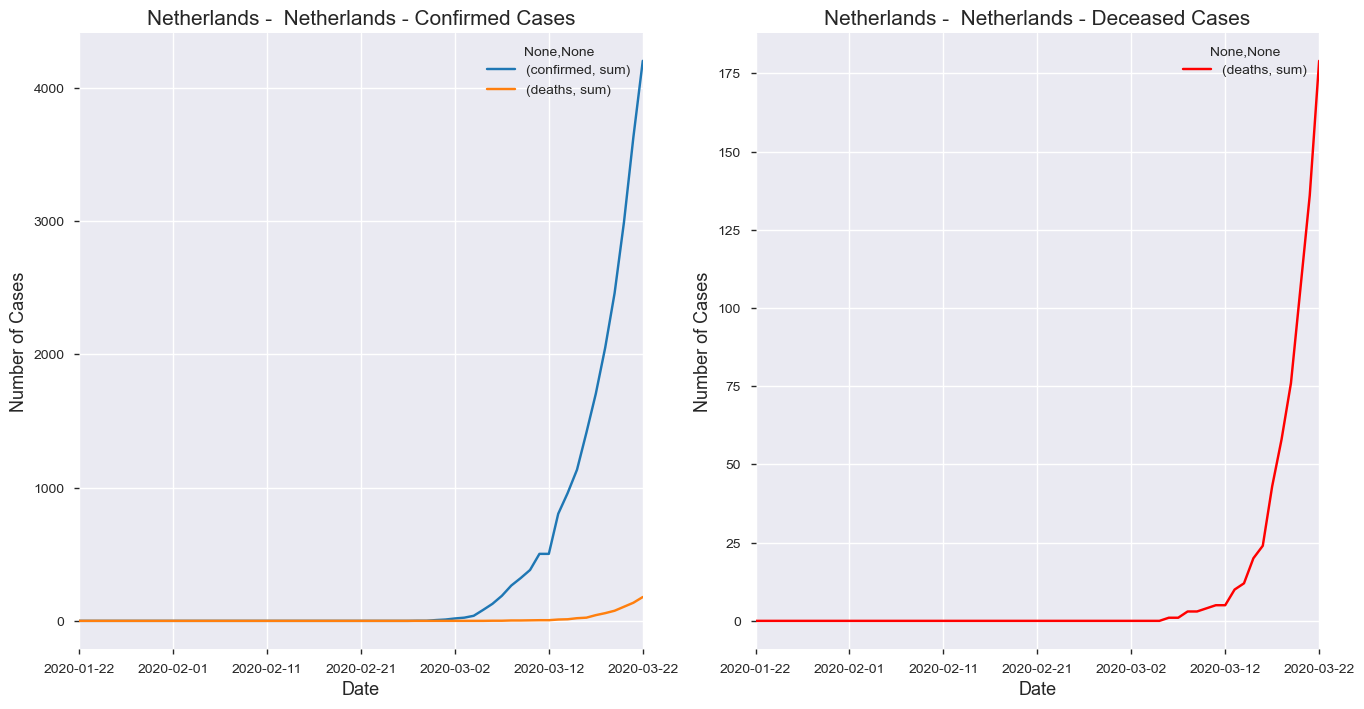

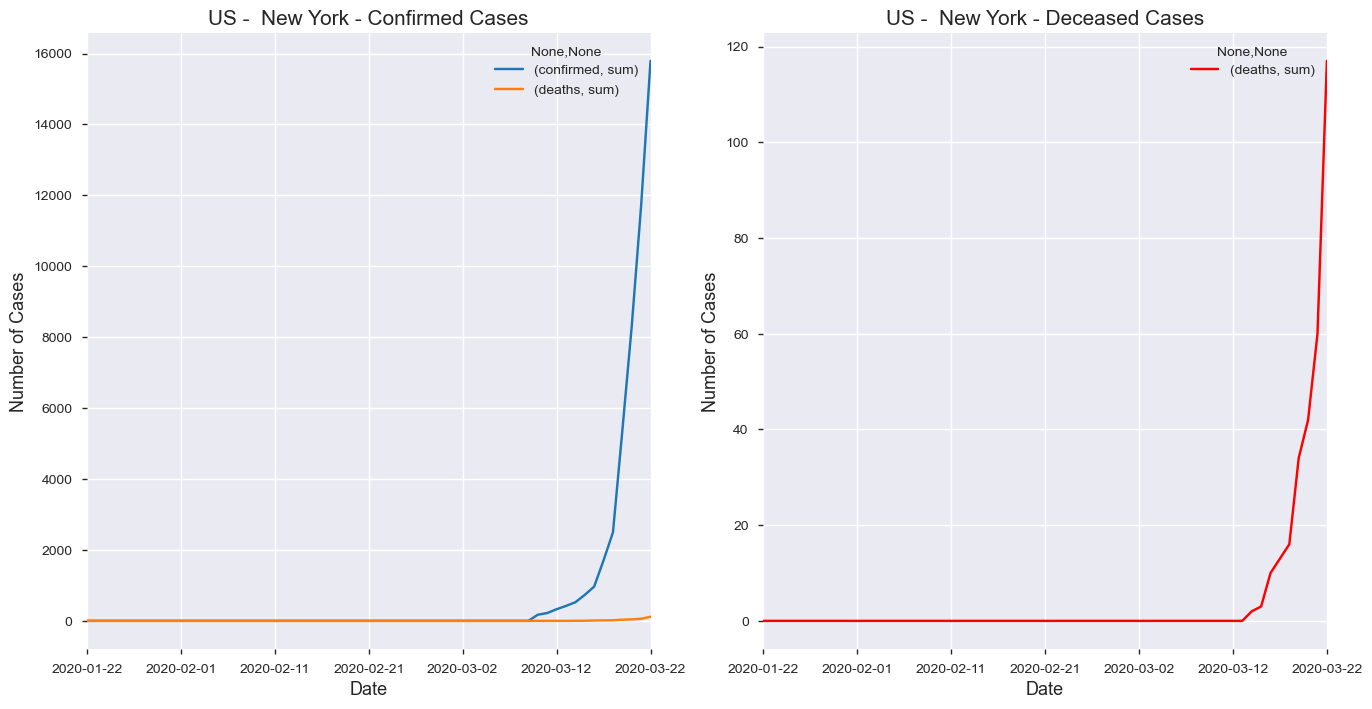

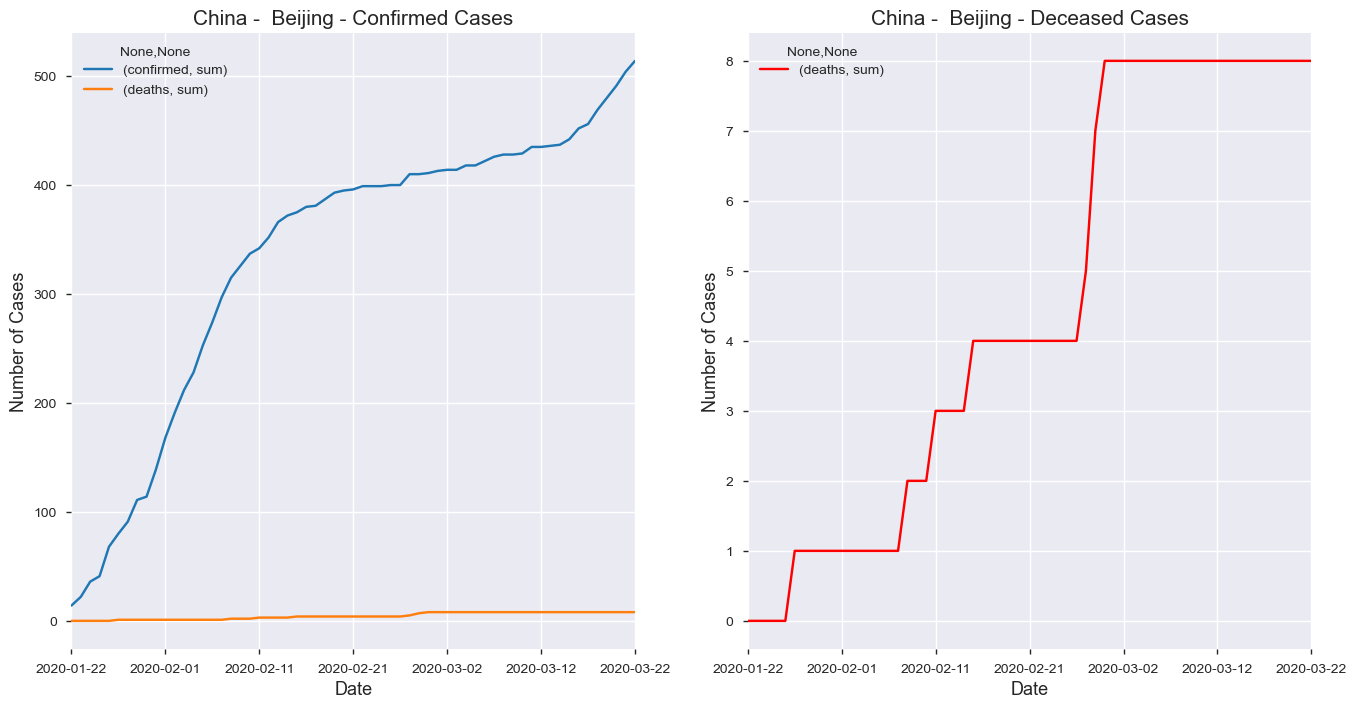

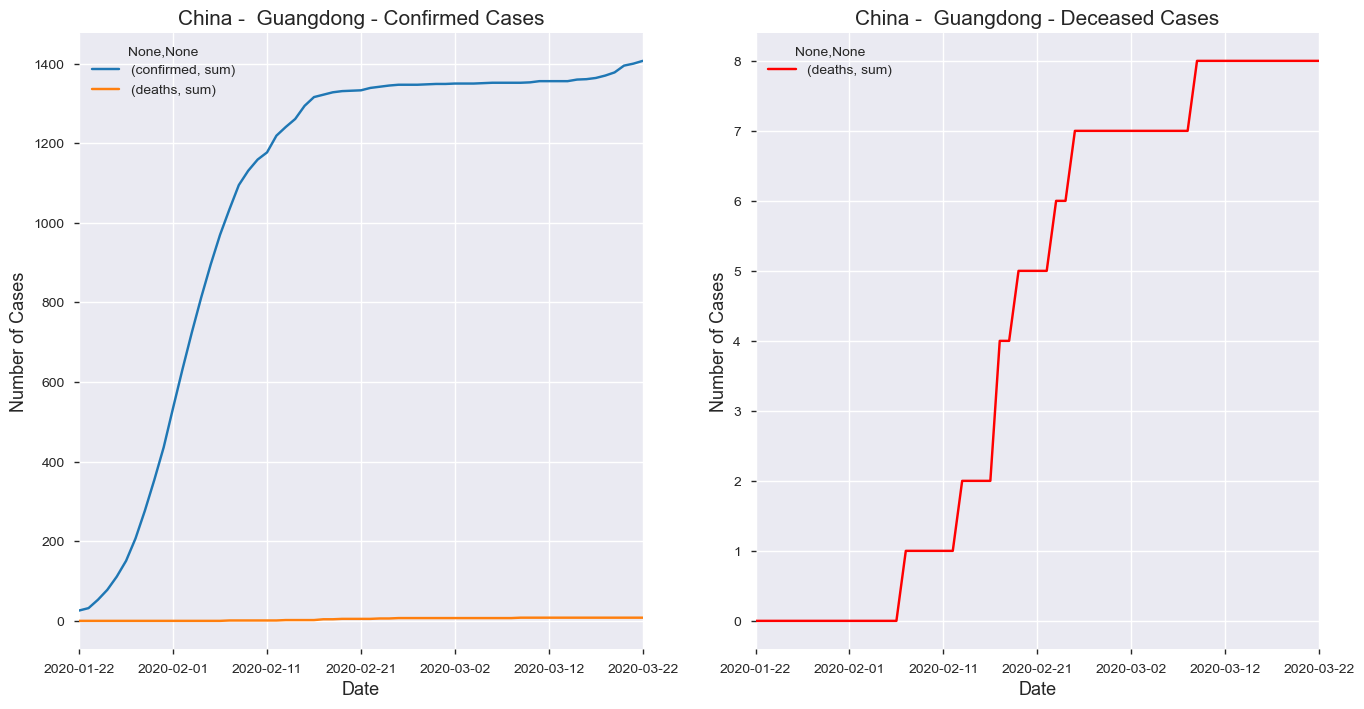

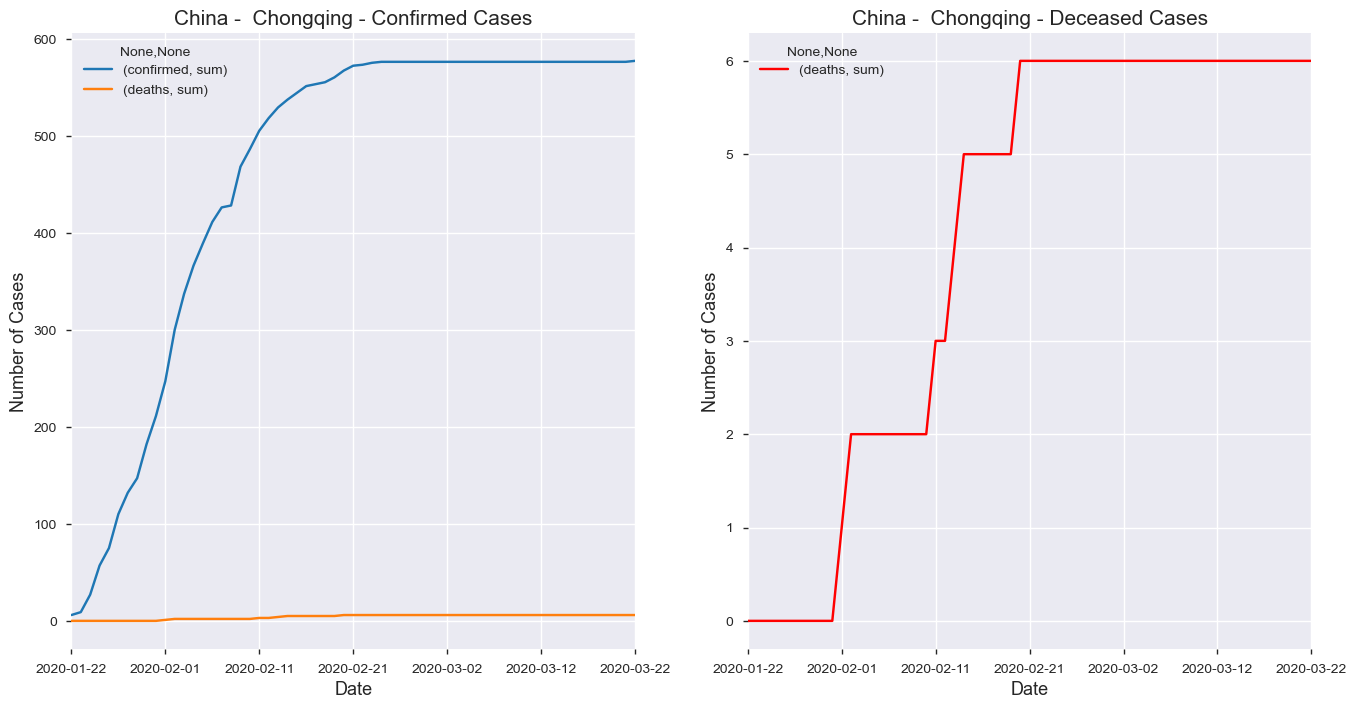

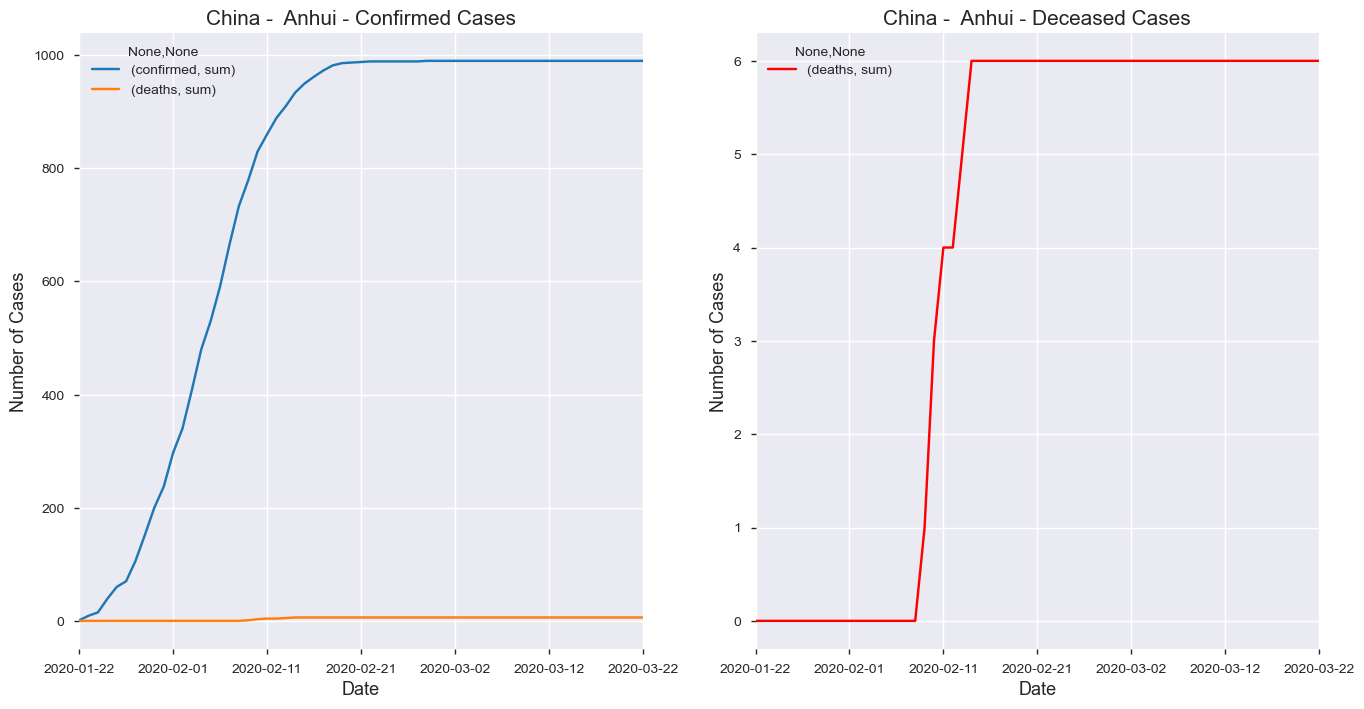

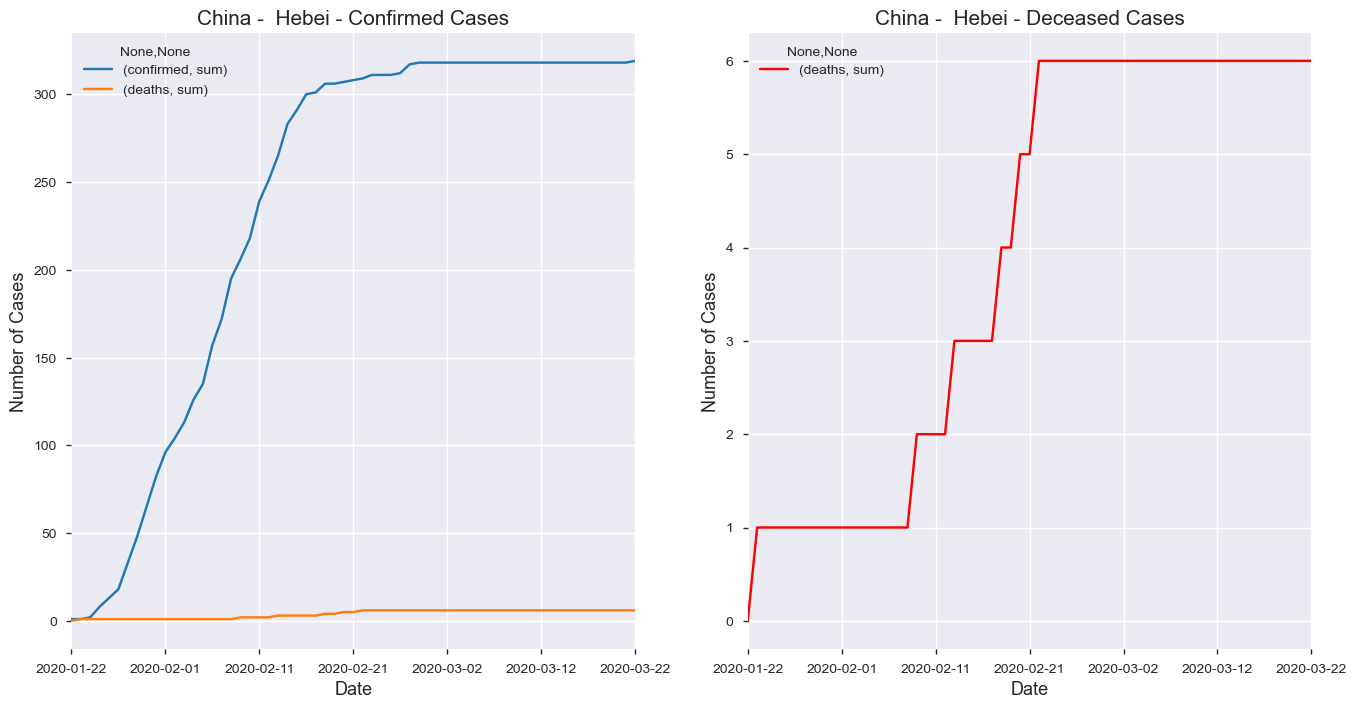

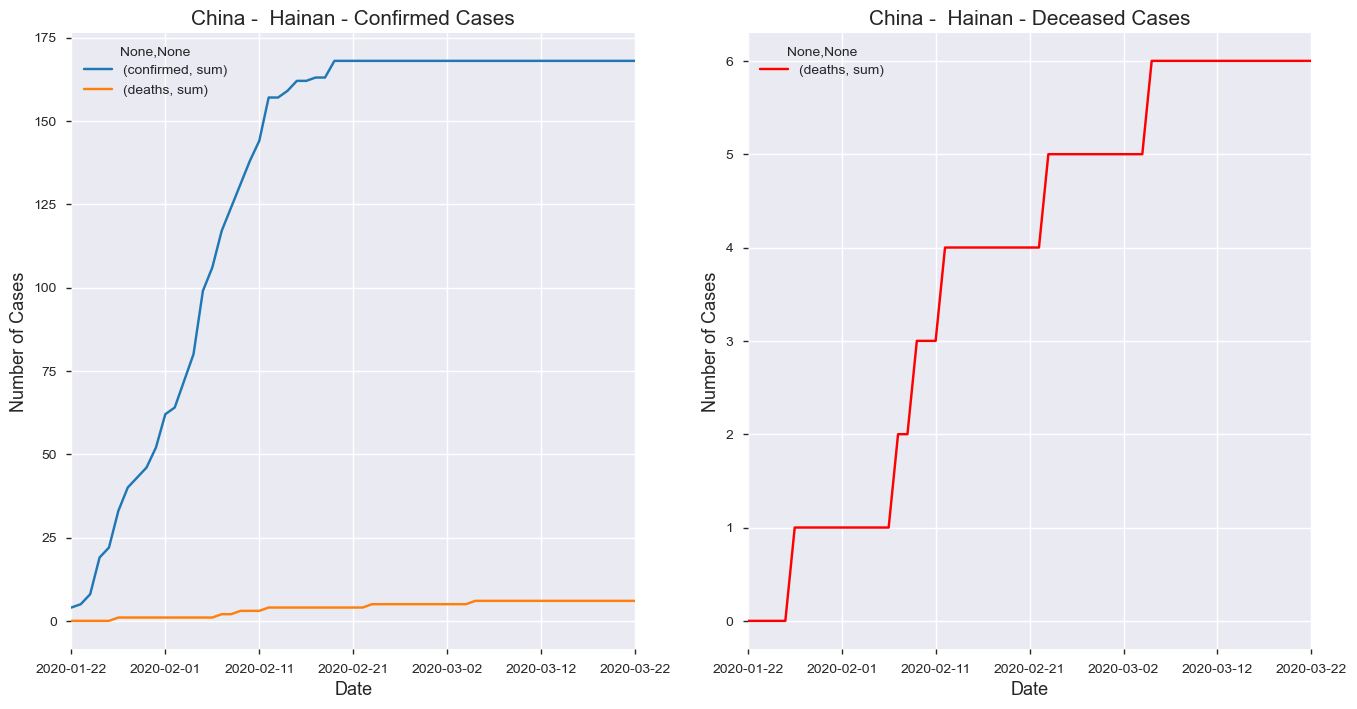

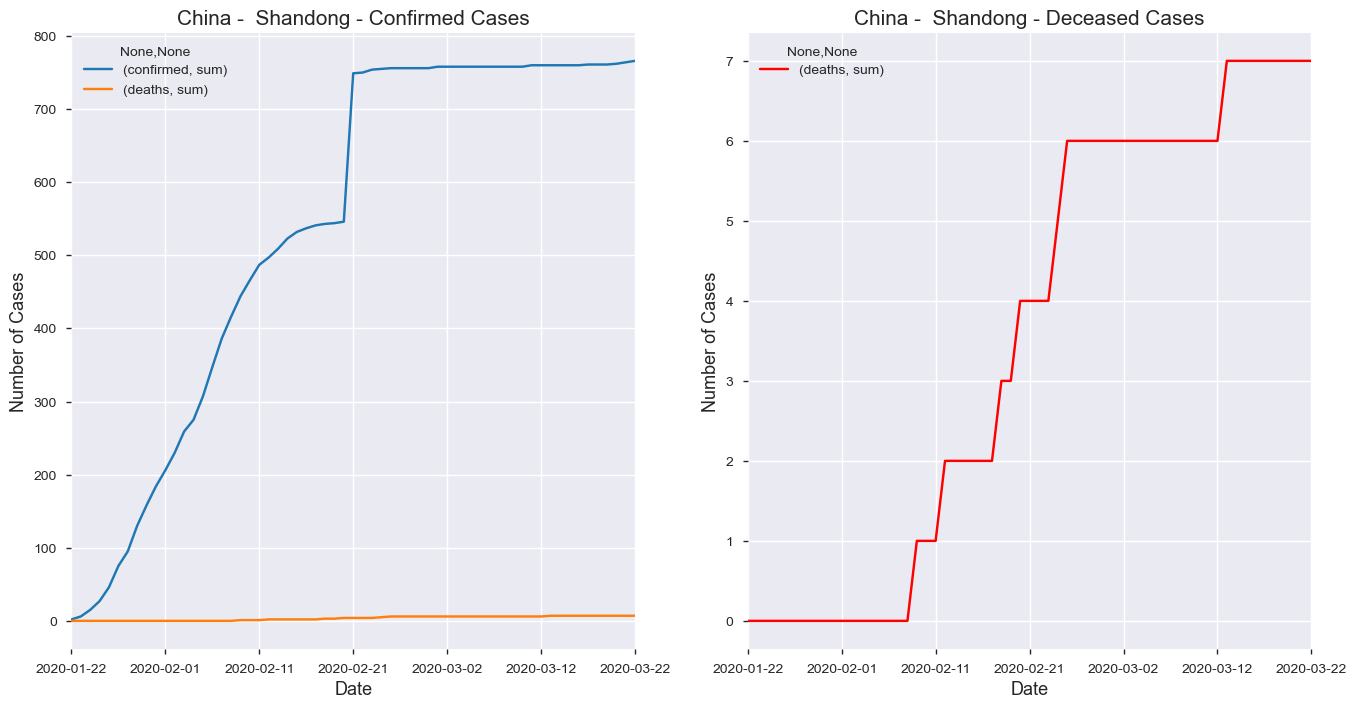

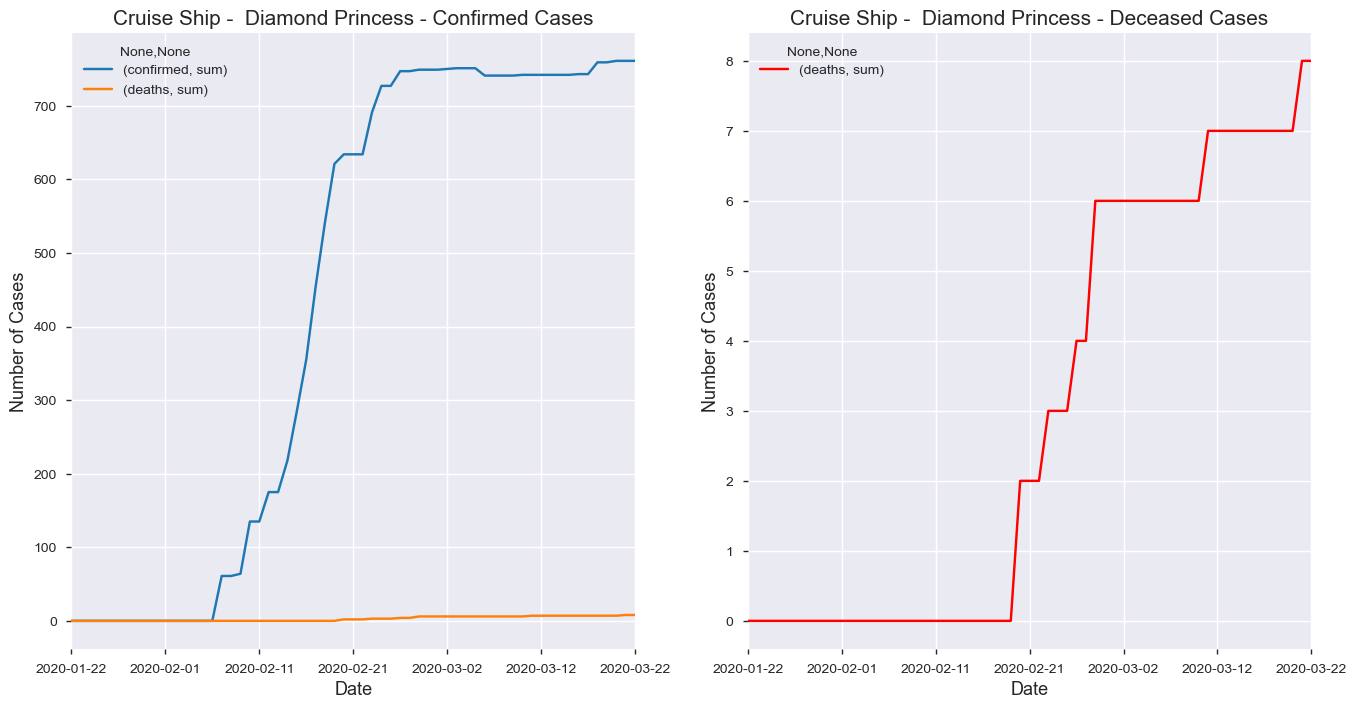

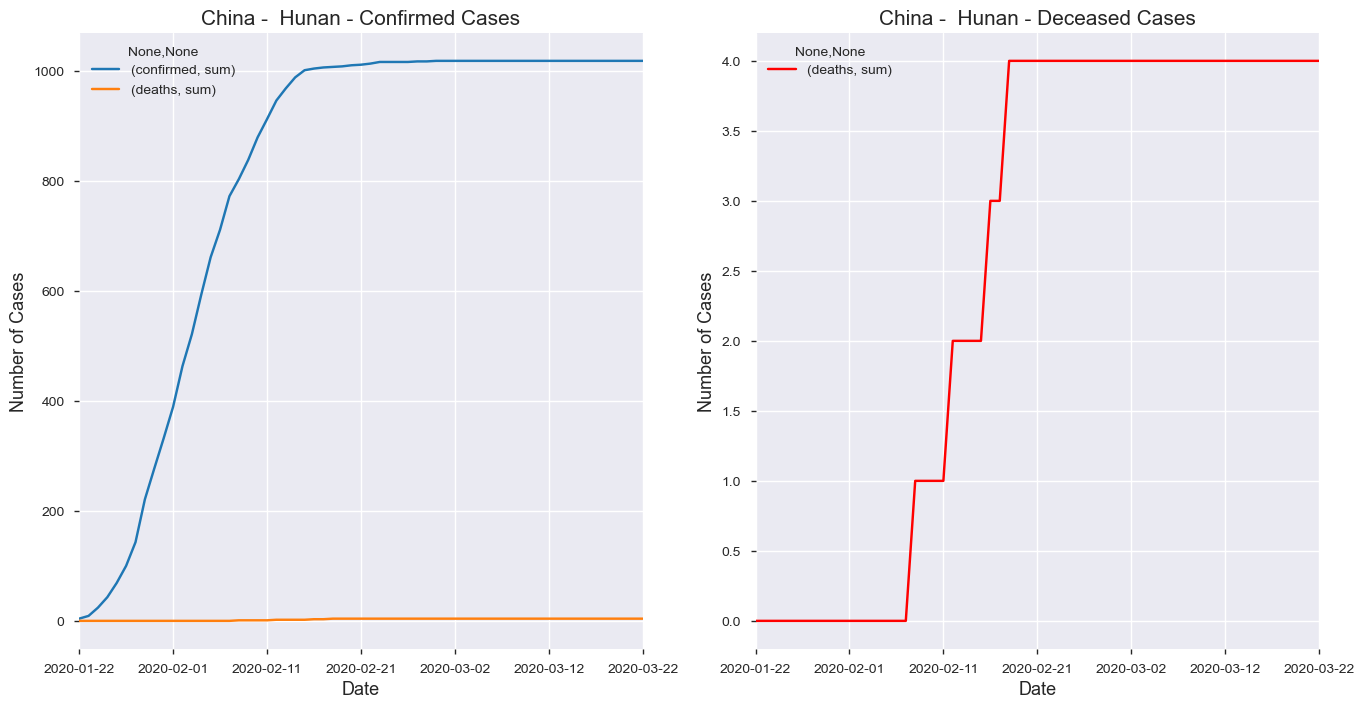

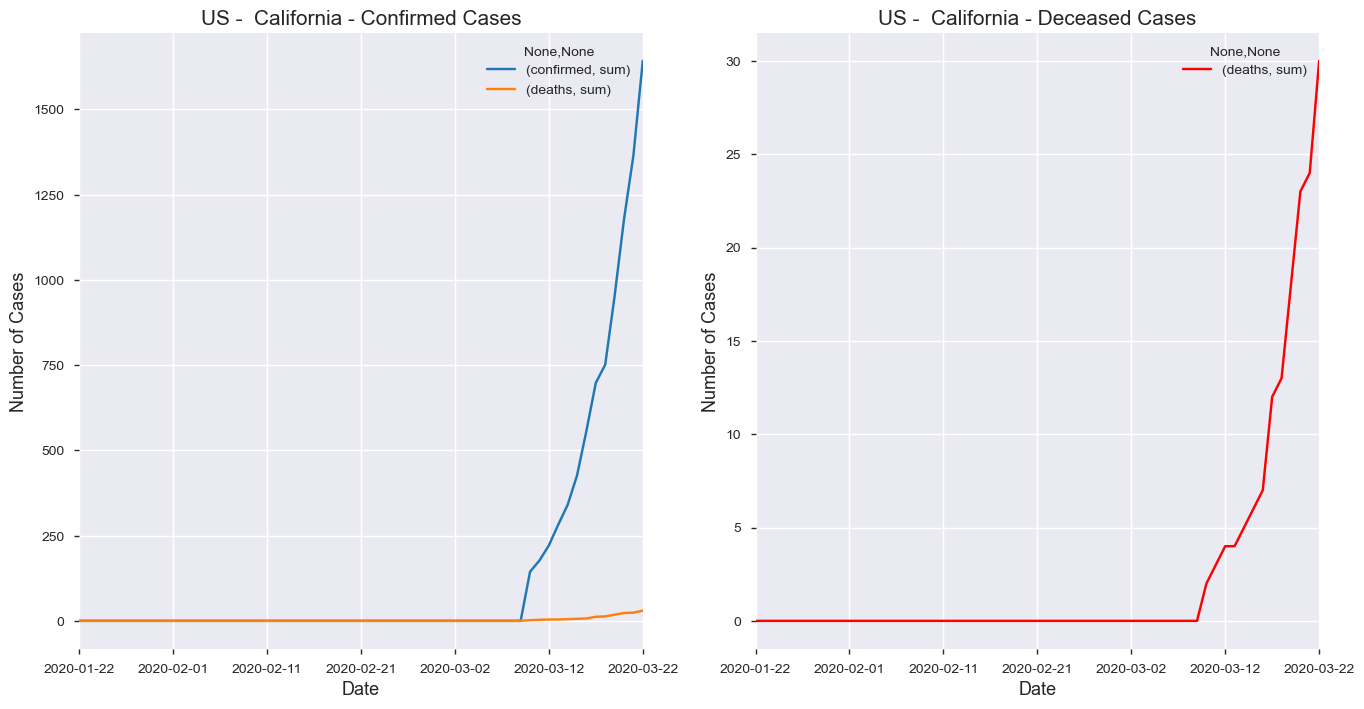

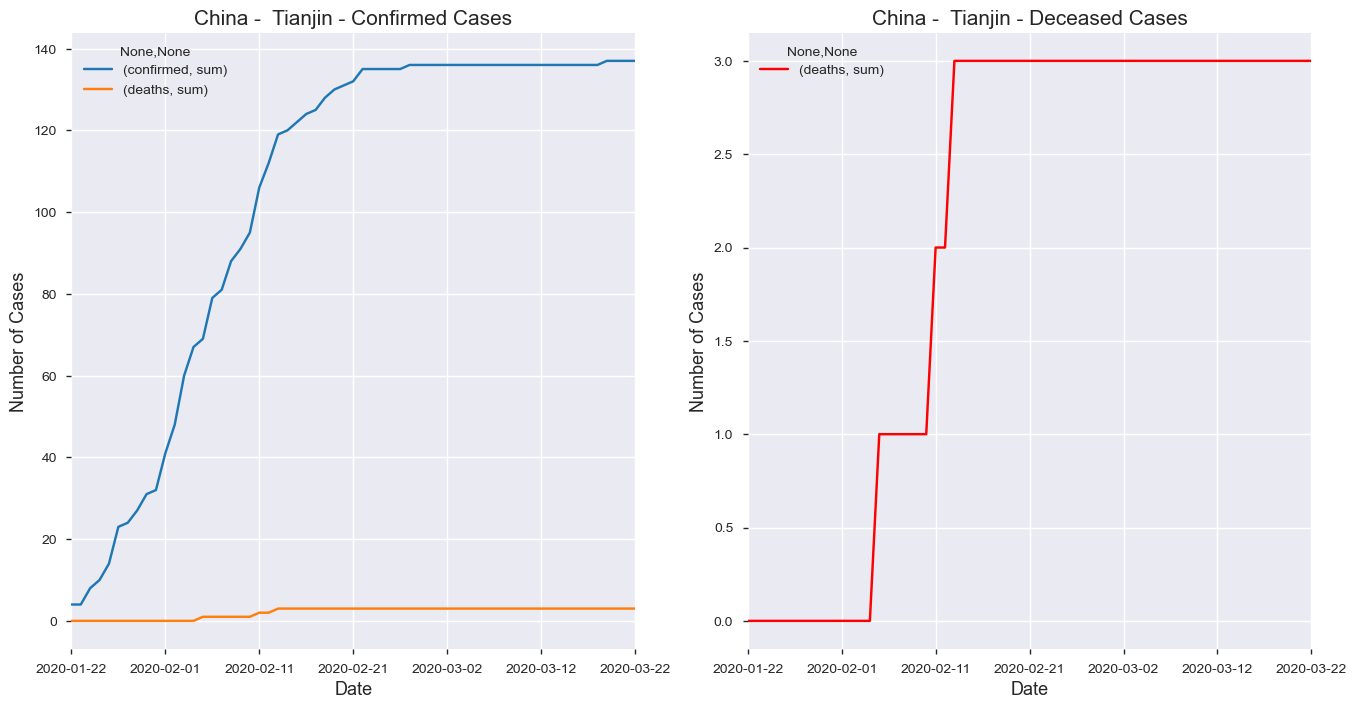

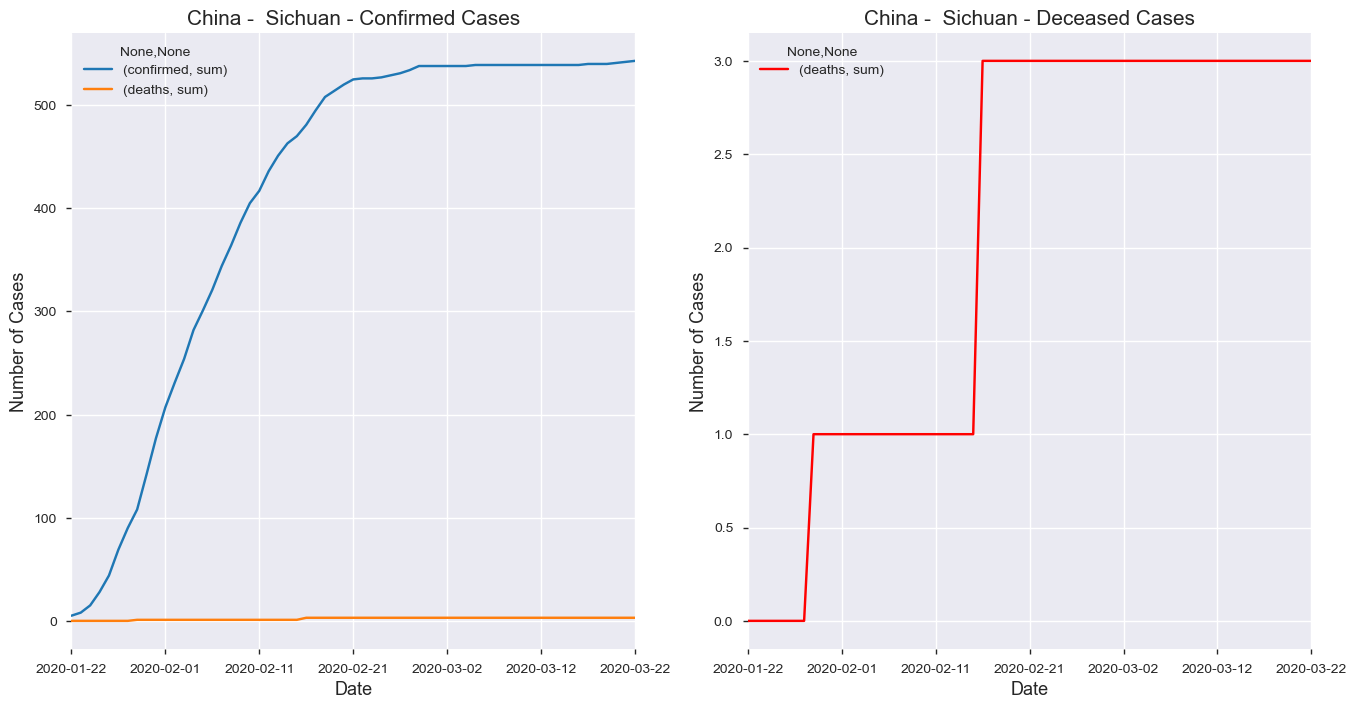

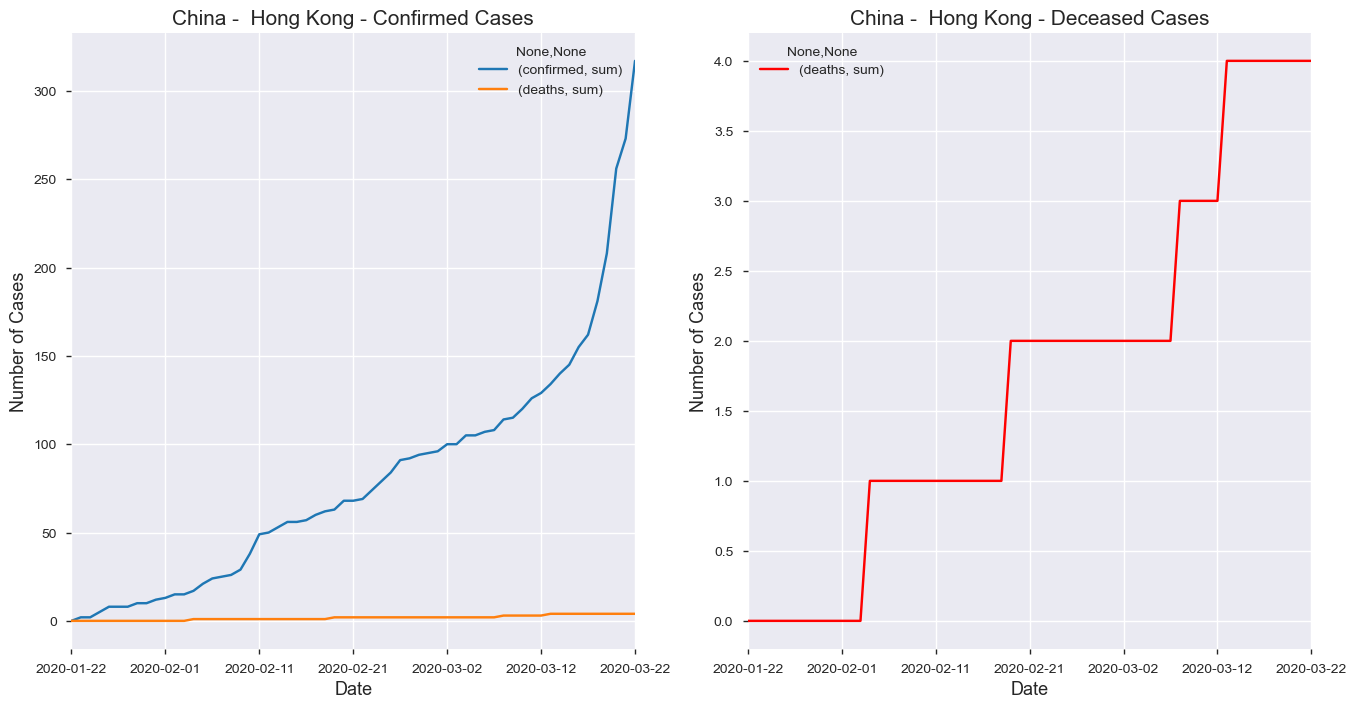

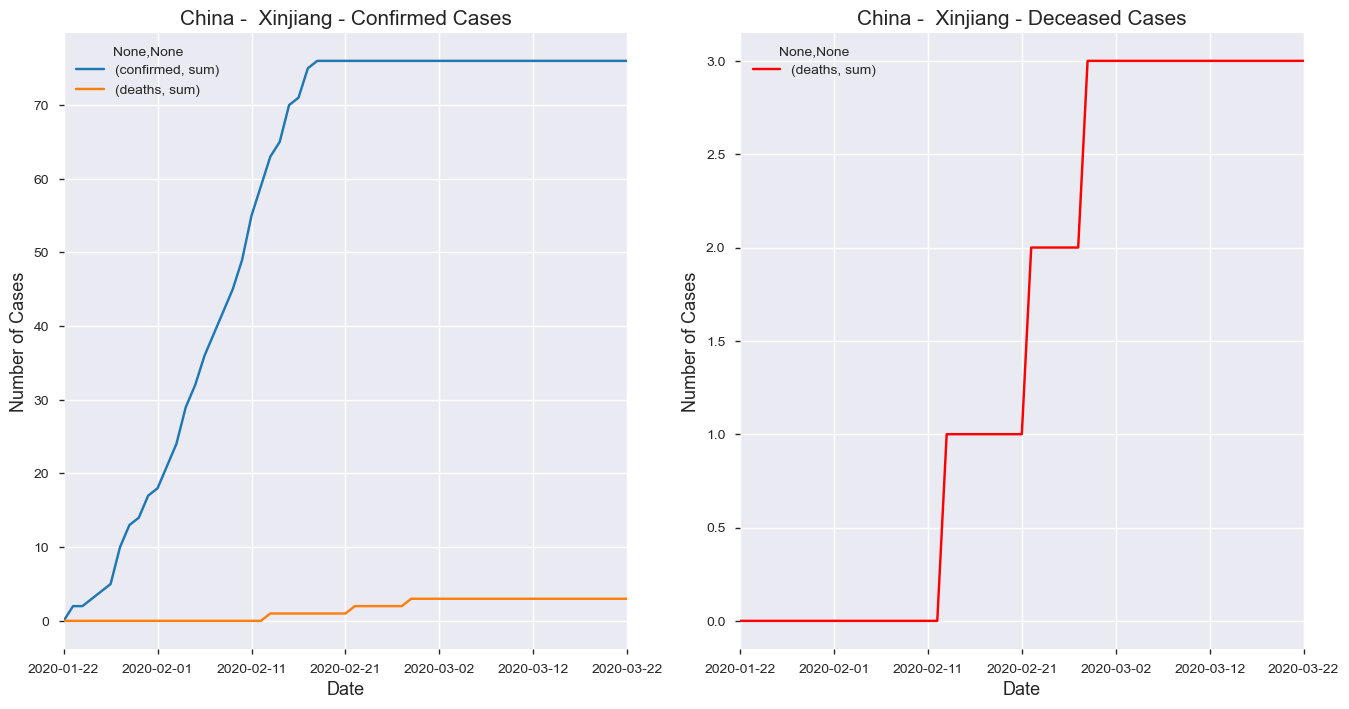

In [58]:
for i in range(0,len(top_province)):
    plot_target(train[train.province == top_province[i]],country=True,province=True)